# **My First ML Project**

## **Oil Price from May/1987 to October/2024**

### **Load Data**

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/datasets/oil-prices/refs/heads/main/data/brent-weekly.csv')
df

,Date,Price
0,1987-05-15,18.58
1,1987-05-22,18.54
2,1987-05-29,18.60
3,1987-06-05,18.70
4,1987-06-12,18.75
...,...,...
1951,2024-10-04,75.88
1952,2024-10-11,79.34
1953,2024-10-18,74.58
1954,2024-10-25,74.69


## **Data Preparation**

## Data Separation as x and y

In [ ]:
y = df['Price']
y

,Price
0,18.58
1,18.54
2,18.60
3,18.70
4,18.75
...,...
1948,72.10
1949,74.98
1950,74.07
1951,75.88


In [ ]:
x = df.drop('Price', axis=1)
x

,Date
0,1987-05-15
1,1987-05-22
2,1987-05-29
3,1987-06-05
4,1987-06-12
...,...
1948,2024-09-13
1949,2024-09-20
1950,2024-09-27
1951,2024-10-04


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [ ]:
x_train

,Date
1934,2024-06-07
1278,2011-11-11
96,1989-03-17
1231,2010-12-17
1003,2006-08-04
...,...
1879,2023-05-19
1895,2023-09-08
1859,2022-12-30
792,2002-07-19


In [ ]:
x_test

,Date
1698,2019-11-29
399,1995-01-06
911,2004-10-29
1349,2013-03-22
1887,2023-07-14
...,...
249,1992-02-21
232,1991-10-25
356,1994-03-11
950,2005-07-29


# **Model Building**

## **Model 1: Linear Regression**

### Training the Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_train['Date'] = pd.to_datetime(x_train['Date']).astype(int) / 10**9

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

### Applying the Model to make prediction

In [ ]:
import pandas as pd

# Assuming 'lr' is your LinearRegression model

# Apply the same transformations to x_test as you did to x_train
x_test = x_test.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, handle errors
x_test['Date'] = pd.to_datetime(x_test['Date']).astype(int) / 10**9 # Convert 'Date' to numeric

# Now predict using the transformed x_test
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [ ]:
y_lr_train_pred

array([50.11923175, 50.11923175, 50.11923175, ..., 50.11923175,
       50.11923175, 50.11923175])

In [ ]:
y_lr_test_pred

array([50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11923175,
       50.11923175, 50.11923175, 50.11923175, 50.11923175, 50.11

### **Evaluate the Model Performance**

In [ ]:
y_train

,Price
1934,76.59
1278,114.68
96,18.81
1231,90.91
1003,76.32
...,...
1879,75.75
1895,91.29
1859,81.83
792,26.28


In [ ]:
y_lr_train_pred

array([50.11923175, 50.11923175, 50.11923175, ..., 50.11923175,
       50.11923175, 50.11923175])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [ ]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  1090.138605427724
LR R2 (Train):  0.0
LR MSE (Test):  1078.5351423007767
LR R2 (Test):  -0.00026903332692973514


In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1090.138605,0.0,1078.535142,-0.000269


## **Model 2: Random Forest**

### Training the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

rf = RandomForestRegressor(max_depth=2, random_state=100)


### Applying the Model To make prediction

In [ ]:
import pandas as pd

x_test = x_test.apply(pd.to_numeric, errors='coerce')
x_test['Date'] = pd.to_datetime(x_test['Date']).astype(int) / 10**9

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

### Evaluate the Model Performance

In [ ]:
y_train

,Price
1934,76.59
1278,114.68
96,18.81
1231,90.91
1003,76.32
...,...
1879,75.75
1895,91.29
1859,81.83
792,26.28


In [ ]:
y_lr_train_pred

array([50.11923175, 50.11923175, 50.11923175, ..., 50.11923175,
       50.11923175, 50.11923175])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [ ]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  1090.1461609993703
RF R2 (Train):  -6.9308357750763605e-06
RF MSE (Test):  1078.6363301179854
RF R2 (Test):  -0.00036287824318148587


In [ ]:
rf_results = pd.DataFrame(['Random Forest Regressor', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest Regressor,1090.146161,-0.000007,1078.63633,-0.000363


## **Models Comparison**

In [ ]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1090.138605,0.0,1078.535142,-0.000269
1,Random Forest Regressor,1090.146161,-0.000007,1078.63633,-0.000363


### **Data Visualization of Predicted Results**

Text(0.5, 0, 'Experimental Price')

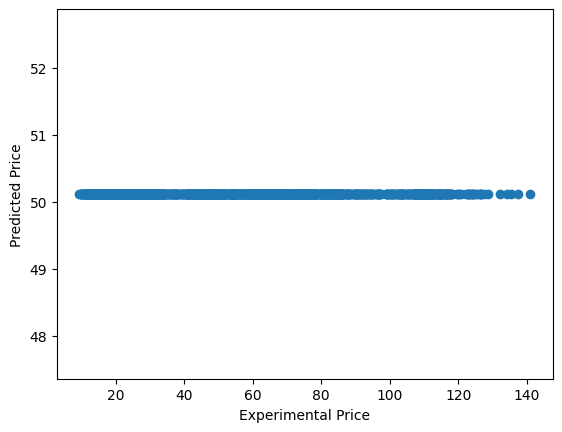

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_lr_train_pred)
plt.plot()

plt.ylabel('Predicted Price')
plt.xlabel('Experimental Price')